In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
data = pd.read_csv("/home/anatol/course/machine-learning-ex1/ex1/ex1data1.txt",
                   names=['pop','prof'],header = None) 
A= np.identity(5)
data["pop"]


0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
5      8.3829
6      7.4764
7      8.5781
8      6.4862
9      5.0546
10     5.7107
11    14.1640
12     5.7340
13     8.4084
14     5.6407
15     5.3794
16     6.3654
17     5.1301
18     6.4296
19     7.0708
20     6.1891
21    20.2700
22     5.4901
23     6.3261
24     5.5649
25    18.9450
26    12.8280
27    10.9570
28    13.1760
29    22.2030
       ...   
67    10.2360
68     5.4994
69    20.3410
70    10.1360
71     7.3345
72     6.0062
73     7.2259
74     5.0269
75     6.5479
76     7.5386
77     5.0365
78    10.2740
79     5.1077
80     5.7292
81     5.1884
82     6.3557
83     9.7687
84     6.5159
85     8.5172
86     9.1802
87     6.0020
88     5.5204
89     5.0594
90     5.7077
91     7.6366
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: pop, Length: 97, dtype: float64

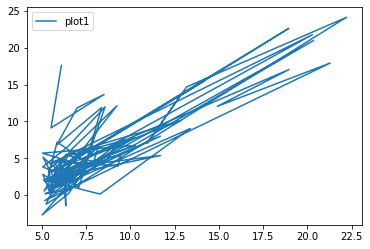

In [2]:
plt.plot(data["pop"],data["prof"],label='plot1')
plt.legend()
plt.show()


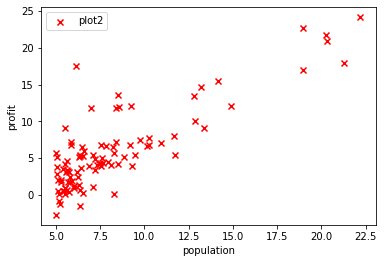

In [3]:
plt.scatter(data["pop"],data["prof"],color="red",
            label="plot2", marker="x")
plt.xlabel('population')
plt.ylabel('profit')
plt.legend()
plt.show()

In [4]:
x = data['pop'].to_numpy(np.float32)#prosto wzial i zachuyaril elementy s datapop w x
x = x.reshape(97,1)
m = x.shape
y =data['prof'].to_numpy(np.float32)
y = y.reshape(97,1)
A = np.matrix('1 2; 3 4')
X = np.hstack((np.ones(m),x))

theta = np.zeros((2,1))
alpha = 0.01
iterations = 1500


In [5]:
def costfunction(X,y,theta):
    m = X.shape[0]
    J = 1/(2*m)*np.sum((X @ theta-y)**2)
    
    return J
costfunction(X,y,theta)
    



32.07273421977694

In [6]:
def grades(X,y,theta,alpha,iter):
    m = X.shape[0]
    J_his = np.zeros((iter,1))
    theta_his = np.zeros((iter+1,2))
    x_sum = np.sum(X[:,1])
    for i in range(iter):
        J_his[i,0] = costfunction(X,y,theta)
        val0 = theta[0,0] - alpha / (m) * (np.sum((X @ theta-y)))
        val1 = theta[1,0] - alpha / (m) * (np.transpose(X @ theta-y) @ X[:,1]) 
        theta_his[i+1,0] = val0
        theta_his[i+1,1] = val1
        theta[0,0] = val0  
        theta[1,0] = val1  
      
    return (J_his,theta_his)

print(grades(X,y,theta,alpha,iterations))

(array([[32.07273422],
       [ 6.73719058],
       [ 5.93159355],
       ...,
       [ 4.48345788],
       [ 4.48343452],
       [ 4.48341124]]), array([[ 0.        ,  0.        ],
       [ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000979],
       ...,
       [-3.62933198,  1.16626598],
       [-3.62981228,  1.16631423],
       [-3.63029171,  1.16636239]]))


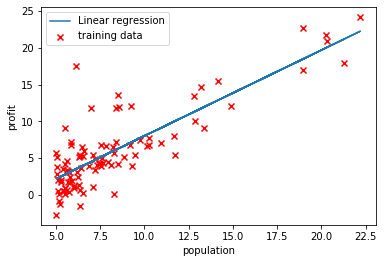

In [7]:
predict1 = [1, 3.5] @ theta
predict2 = [1, 7] @ theta
predicted = X @ theta
plt.scatter(data["pop"],data["prof"],color="red",
            label="training data", marker="x")
plt.plot(X[:,1],predicted,label="Linear regression")
plt.xlabel('population')
plt.ylabel('profit')
plt.legend()
plt.show()

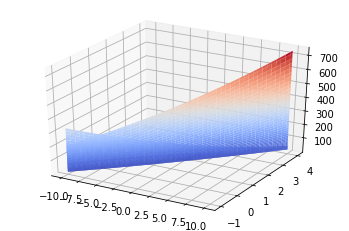

In [8]:
theta0_val = np.linspace(-10,10,100)
theta1_val = np.linspace(-1,4,100)
J_val = np.zeros((theta0_val.shape[0],theta1_val.shape[0]))
for i in range(theta0_val.shape[0]):
        for j in  range(theta1_val.shape[0]):
                t = np.array([[theta0_val[i]], [theta1_val[j]]]);
                J_val[i,j] = costfunction(X, y, t); 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_val,theta1_val,np.transpose(J_val),cmap = cm.coolwarm)


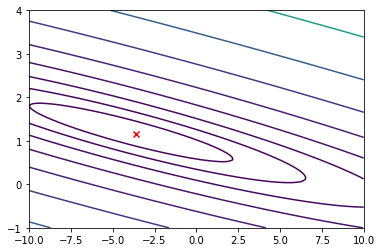

In [9]:
plt.contour(theta0_val,theta1_val,np.transpose(J_val),
            levels = np.logspace(-2, 3, num = 20))
plt.scatter(theta[0,0],theta[1,0],color="red",
            label="plot2", marker="x")